# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing

In [2]:
X = np.arange(-100, 100, 4, dtype=np.float64)
y = X + 10

In [3]:
X.shape

(50,)

In [4]:
X = tf.constant(X)
y = tf.constant(y)

In [5]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [6]:
print(f'Training Data : {len(X_train)*100/len(X)}%')
print(f'Testing Data : {len(X_test)*100/len(X)}%')

Training Data : 80.0%
Testing Data : 20.0%


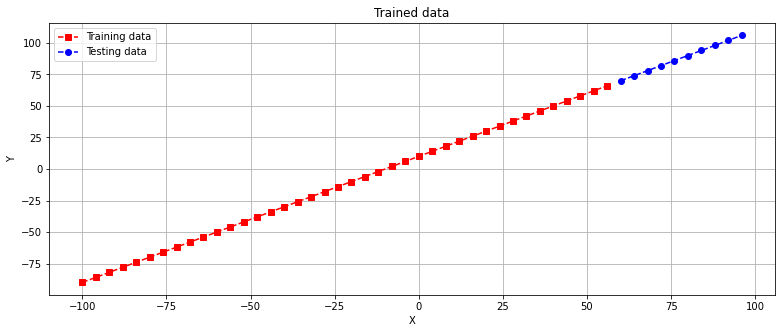

In [7]:
plt.figure(figsize=(13, 5))
plt.plot(X_train, y_train, 'rs--', label='Training data')
plt.plot(X_test, y_test, 'bo--', label='Testing data')
plt.title('Trained data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.show()

# Creating the model

In [8]:
# Set random seed
tf.random.set_seed(42)

In [9]:
# Creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,), name='Input_layer'),
    tf.keras.layers.Dense(10, name='Hidden_layer'),
    tf.keras.layers.Dense(1, name='Output_layer')
], name='ANN')

In [10]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [11]:
model.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_layer (Dense)         (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Trainable params: Parameters that going to update during training
* Non-trainable params: These parameters will not going to update during the training (use in **transfer learning**)

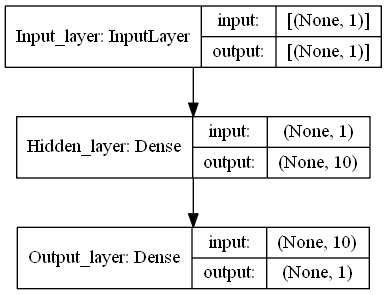

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [13]:
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluation the model

In [14]:
y_pred = model.predict(X_test)

In [12]:
def plot_Predictions(X_test, y_test, y_pred):
    '''
    Plot test data vs predicted data
    '''

    plt.figure(figsize=(13, 5))
    plt.plot(X_test, y_pred, 'rs--', label='Y-Predictions')
    plt.plot(X_test, y_test, 'bo--', label='Y-Actual')
    plt.title('Trained data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(X_test)
    plt.grid()
    plt.legend()

    plt.show()

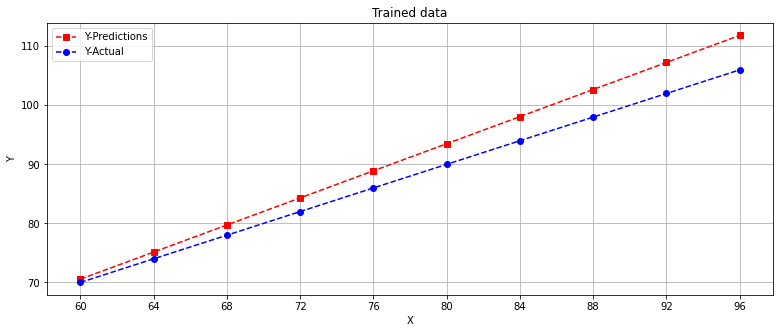

In [16]:
plot_Predictions(X_test, y_test, y_pred)

In [17]:
def MAE(y_true, y_pred):
    '''
    Doc string :
    Computes the mean absolute error between labels and predictions.
    '''

    err = np.zeros(len(y_true))

    for i in range(len(y_true)):
        err[i] = np.abs(y_true[i] - y_pred[i])

    return np.mean(err)

In [18]:
def MSE(y_true, y_pred):
    '''
    Doc string :
    Computes the mean squared error between labels and predictions.
    '''

    err = np.zeros(len(y_true))

    for i in range(len(y_true)):
        err[i] = np.square(y_true[i] - y_pred[i])

    return np.mean(err)

In [19]:
MAE(y_test, y_pred), MSE(y_test, y_pred)

(3.1969398498535155, 13.070125674881274)

In [20]:
tf.metrics.mean_absolute_error(y_test, np.squeeze(y_pred)), tf.metrics.mean_squared_error(y_test, np.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [21]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 225ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

# Running experiments to improve the model

## Model_1 : 1-layer, 100 epochs

1/1 [==============================] - 0s 162ms/step - loss: 18.7453 - mse: 353.5734
18.74532699584961 353.5733642578125


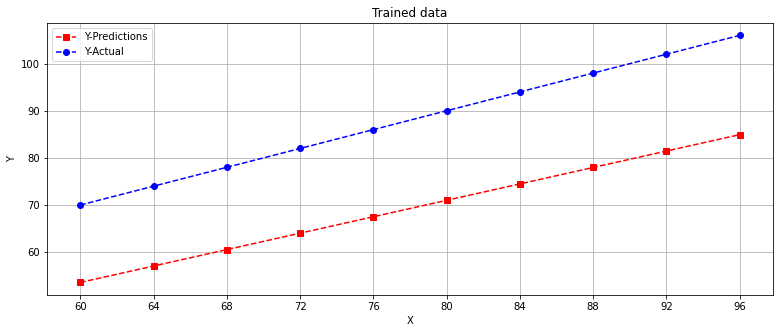

In [22]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(1),
    tf.keras.layers.Dense(1)
], name='model_1')

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_1.fit(X_train, y_train, epochs=100,verbose=0)

mae1, mse1 = model_1.evaluate(X_test, y_test)
print(mae1, mse1)
plot_Predictions(X_test, y_test, model_1.predict(X_test))

## Model_2 : 2-layer, 100 epochs

1/1 [==============================] - 0s 168ms/step - loss: 3.1969 - mse: 13.0701
3.1969382762908936 13.0701265335083


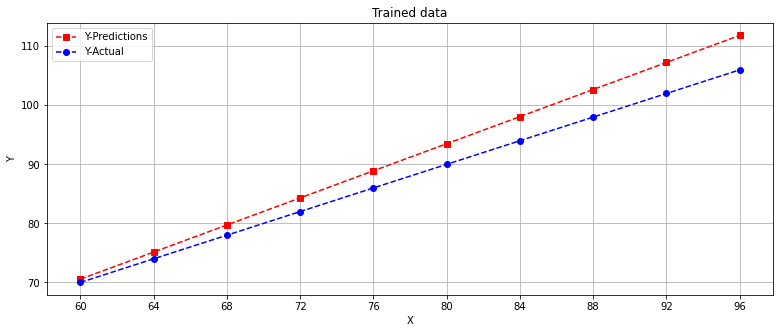

In [23]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_1')

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_2.fit(X_train, y_train, epochs=100,verbose=0)

mae2, mse2 = model_2.evaluate(X_test, y_test)
print(mae2, mse2)
plot_Predictions(X_test, y_test, model_2.predict(X_test))

## Model_3 : 2-layer, 500 epochs

1/1 [==============================] - 0s 169ms/step - loss: 68.7136 - mse: 4808.0273
68.71361541748047 4808.02734375


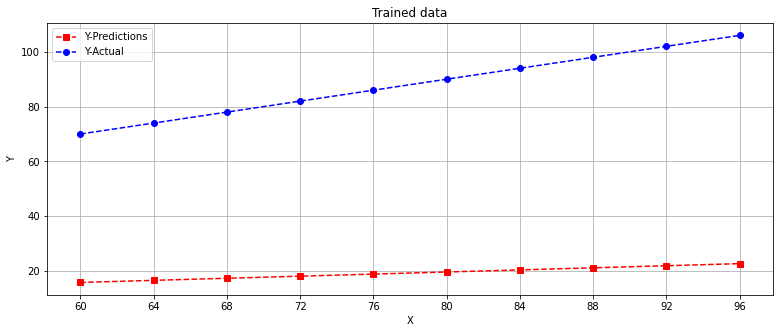

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_1')

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_3.fit(X_train, y_train, epochs=500,verbose=0)

mae3, mse3 = model_3.evaluate(X_test, y_test)
print(mae3, mse3)
plot_Predictions(X_test, y_test, model_3.predict(X_test))

2/2 [==============================] - 0s 3ms/step - loss: 33.5235 - mse: 1545.9418
[33.52349853515625, 1545.9417724609375]


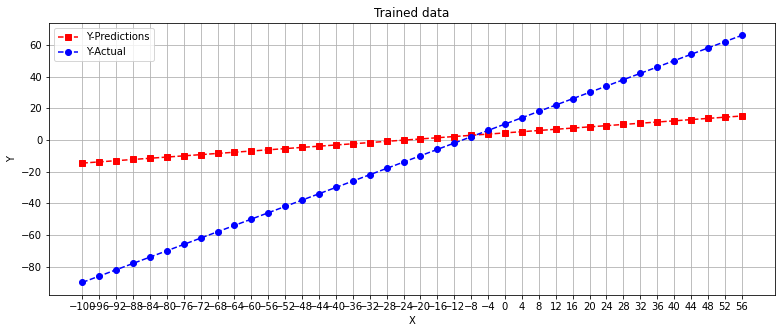

In [25]:
print(model_3.evaluate(X_train, y_train))
plot_Predictions(X_train, y_train, model_3.predict(X_train))

# Compare model performance
## Use `tensorboard` or `weights and biases` for run experiments and compare models.

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(
    [
        ['model_1', mae1, mse1],
        ['model_2', mae2, mse2],
        ['model_3', mae3, mse3]
    ],
    columns=['Model', 'MAE', 'MSE']
)

In [28]:
df

,Model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196938,13.070127
2,model_3,68.713615,4808.027344


# Save a TensorFlow model
## There are two main formats
## 1. SavedModel
## 2. HDF5 (.h5)

In [29]:
model_2.save('model_2')

INFO:tensorflow:Assets written to: model_2\assets


In [30]:
model_2.save('model_2.h5')

In [6]:
model_2_reloaded_savedModel = tf.keras.models.load_model('model_2')

In [7]:
model_2_reloaded_savedModel.evaluate(X_test, y_test)

1/1 [==============================] - 0s 293ms/step - loss: 3.1969 - mse: 13.0701


[3.1969382762908936, 13.0701265335083]

In [8]:
model_2_reloaded_savedModel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


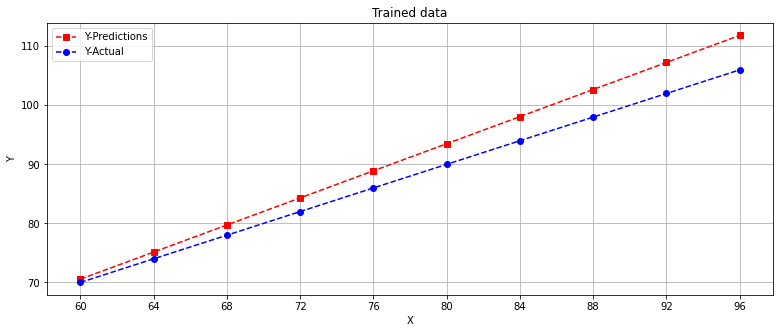

In [13]:
plot_Predictions(X_test, y_test, model_2_reloaded_savedModel.predict(X_test))

In [9]:
model_2_reloaded_HDF5 = tf.keras.models.load_model('model_2.h5')

In [10]:
model_2_reloaded_HDF5.evaluate(X_test, y_test)

1/1 [==============================] - 0s 356ms/step - loss: 3.1969 - mse: 13.0701


[3.1969382762908936, 13.0701265335083]

In [11]:
model_2_reloaded_HDF5.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


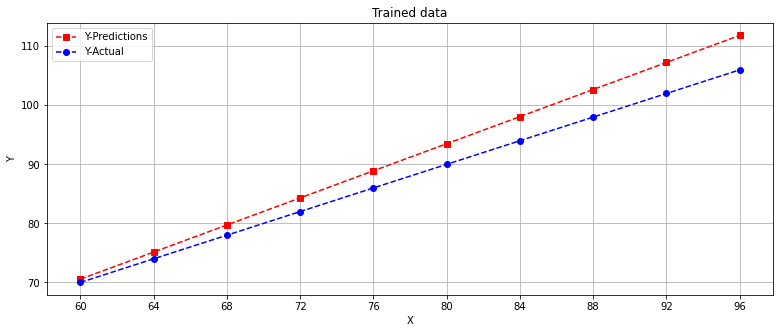

In [14]:
plot_Predictions(X_test, y_test, model_2_reloaded_HDF5.predict(X_test))

# Save and download files from Google Colab

## Download

In [ ]:
# from google.colab import files
# files.download('/content/model_2.h5')

## Save to google drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#model_2.save('/content/drive/MyDrive/model.h5')
# or
#!cp /content/model_2.h5 /content/drive/
# For check
#!ls /content/drive/MyDrive